In [44]:
import result_analization.load_test_result as ltr
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

In [45]:
path = "/Users/nduginets/PycharmProjects/master-diploma/tmp_data/classifiers"

In [46]:
#pix2pix20 = ltr.get_vals(path, "bussio_pix_2pix_classifier_20")
#pix2pix50 = ltr.get_vals(path, "bussio_pix_2pix_classifier_50")
pix2pix80 = ltr.get_vals(path, "bussio_pix_2pix_classifier_80")

pix2pix120 = ltr.get_vals(path, "bussio_pix_2pix_classifier_120")
pix2pix150 = ltr.get_vals(path, "bussio_pix_2pix_classifier_150")
pix2pix180 = ltr.get_vals(path, "bussio_pix_2pix_classifier_180")

datasets = [
    #("bussio_pix2pix20", pix2pix20),
    #("bussio_pix2pix50", pix2pix50),
    ("bussio_pix2pix80", pix2pix80),
    #("bussio_pix2pix120", pix2pix120),
    # ("bussio_pix2pix150", pix2pix150),
    ("bussio_pix2pix180", pix2pix180),
]
default_data_bussio = ltr.create_dataset(datasets)

In [47]:
#pix2pix20 = ltr.get_vals(path, "bussio_boxed_pix_2pix_classifier_20")
#pix2pix50 = ltr.get_vals(path, "bussio_boxed_pix_2pix_classifier_50")
pix2pix80 = ltr.get_vals(path, "bussio_boxed_pix_2pix_classifier_80")

#pix2pix120 = ltr.get_vals(path, "bussio_boxed_pix_2pix_classifier_120")
pix2pix150 = ltr.get_vals(path, "bussio_boxed_pix_2pix_classifier_150")
pix2pix180 = ltr.get_vals(path, "bussio_boxed_pix_2pix_classifier_180")

datasets = [
    #("boxed_bussio_pix2pix20", pix2pix20),
    #("boxed_bussio_pix2pix50", pix2pix50),
    ("boxed_bussio_pix2pix80", pix2pix80),
    #("boxed_bussio_pix2pix120", pix2pix120),
    #("boxed_bussio_pix2pix150", pix2pix150),
    ("boxed_bussio_pix2pix180", pix2pix180),
]
boxed_data_bussio = ltr.create_dataset(datasets)

In [48]:
classifier = ltr.get_vals(path, "bussio_classifier_")

datasets = [
    ("classifier", classifier)
]
classifier_bussio = ltr.create_dataset(datasets)

In [49]:
def get_last_values(dataset_to_fetch, *args):
    result = []
    for (name, data) in dataset_to_fetch:
        values_to_return = []
        latest_epoch = max([max(list(map(lambda x: x, launch.keys()))) for launch in data])
        for launch in data:
            if latest_epoch not in launch:
                continue
            initial_node = launch[latest_epoch]
            for p in args:
                initial_node = initial_node[p]
            values_to_return.append(initial_node)
        result.append((name, values_to_return))
    return result

In [50]:
def calculate_var(dataset_prepared):
    result = []
    for (name, data) in dataset_prepared:
        array = np.array(data)

        result.append((name, np.var(array)))
    return result

In [51]:
def calculate_avg(dataset_prepared):
    result = []
    for (name, data) in dataset_prepared:
        array = np.array(data)

        result.append((name, np.mean(array)))
    return result

In [52]:
def dump_stat(measure_path):
    merged_dataset = classifier_bussio + boxed_data_bussio + default_data_bussio
    variances = calculate_var(get_last_values(merged_dataset, *measure_path))
    means = calculate_avg(get_last_values(merged_dataset, *measure_path))

    x = list(map(lambda v: v[0], merged_dataset))
    y = list(map(lambda v: v[1], means))
    e = list(map(lambda v: math.sqrt(v[1]), variances))
    for i in range(len(e)):
        if "boxed" in x[i]:
            e[i] = e[i] / 4

    print(*measure_path)
    plt.figure(figsize=(20, 10))
    plt.errorbar(x, y, e, linestyle='None', marker='^')
    plt.xticks(rotation=45)
    plt.show()

    datas = zip(y, e)
    frame = pd.DataFrame(datas, index=x, columns=["avg", "var"])
    print(frame)

f1_micro
                              avg       var
classifier               0.853760  0.003610
boxed_bussio_pix2pix80   0.839378  0.001111
boxed_bussio_pix2pix180  0.886200  0.005472
bussio_pix2pix80         0.843040  0.003556
bussio_pix2pix180        0.871200  0.005724


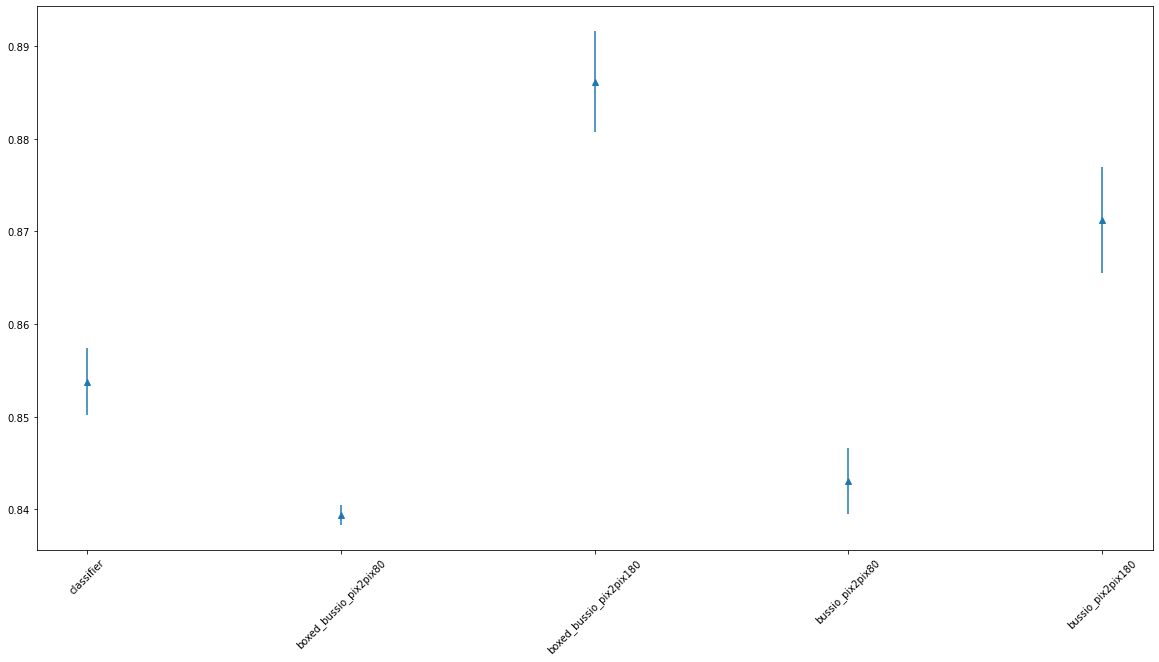

In [53]:
measure_path = ["f1_micro"]
dump_stat(measure_path)

f1_macro
                              avg       var
classifier               0.421119  0.028795
boxed_bussio_pix2pix80   0.397661  0.006984
boxed_bussio_pix2pix180  0.627846  0.027415
bussio_pix2pix80         0.390598  0.023916
bussio_pix2pix180        0.578786  0.021649


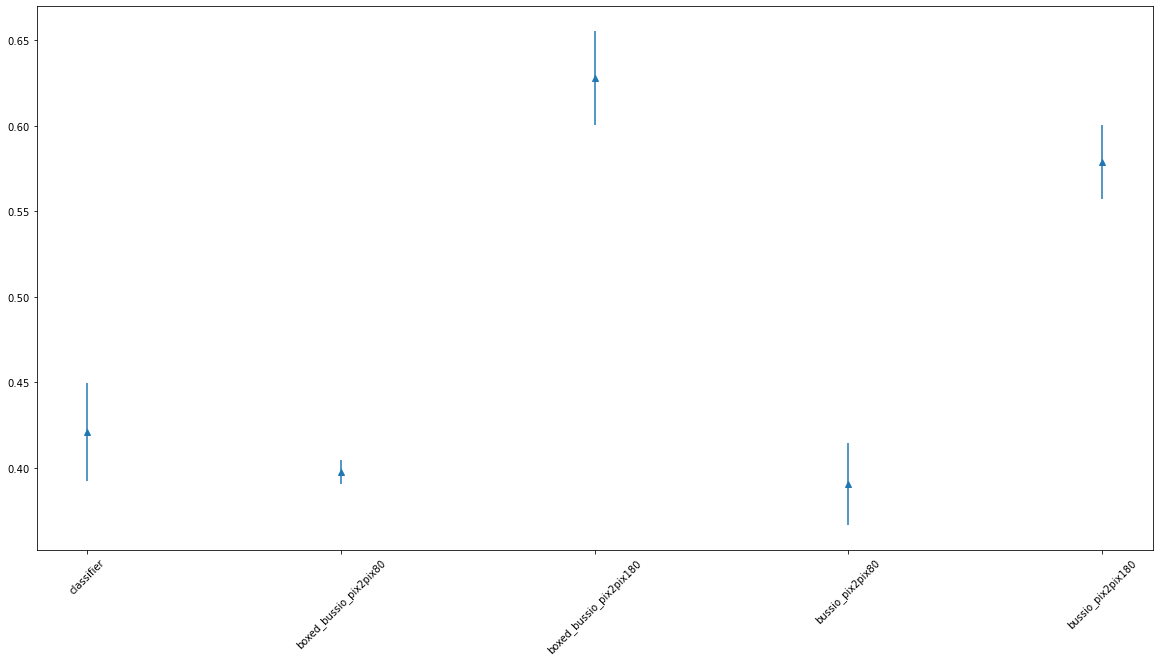

In [54]:
measure_path = ["f1_macro"]
dump_stat(measure_path)

# заболевания f1_binary

globules f1_binary
                              avg       var
classifier               0.497971  0.045388
boxed_bussio_pix2pix80   0.341799  0.015293
boxed_bussio_pix2pix180  0.700005  0.018952
bussio_pix2pix80         0.368180  0.069748
bussio_pix2pix180        0.631787  0.045131


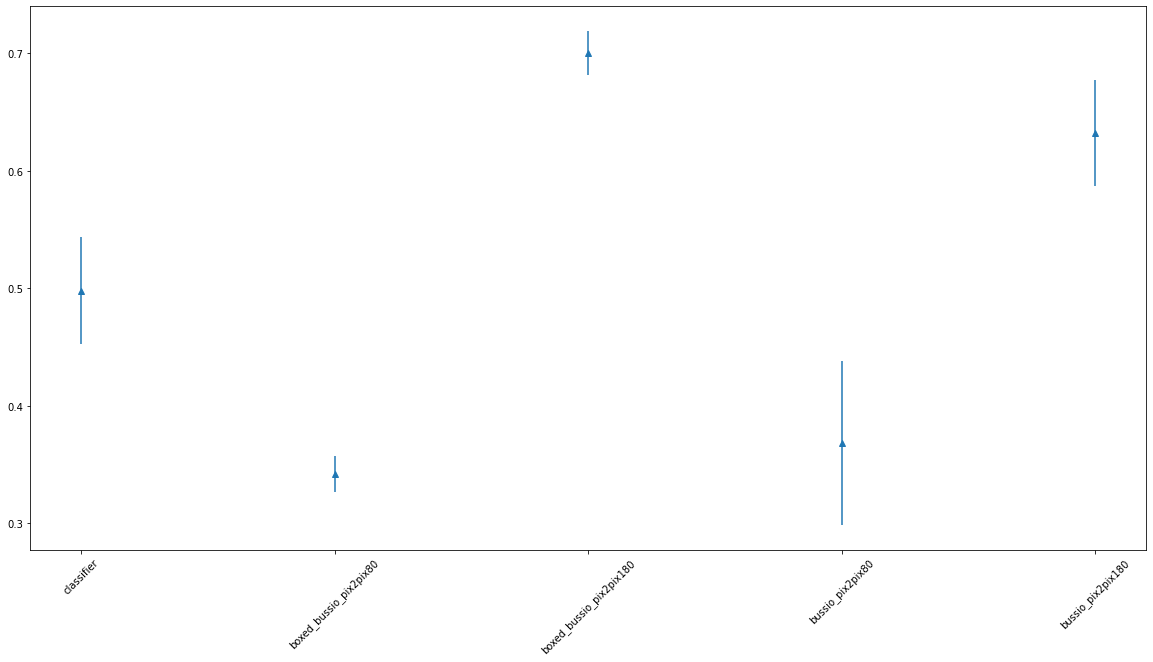

In [55]:
measure_path = ["globules", "f1_binary"]
dump_stat(measure_path)

milia_like_cyst f1_binary
                              avg       var
classifier               0.200791  0.041032
boxed_bussio_pix2pix80   0.189423  0.013487
boxed_bussio_pix2pix180  0.474305  0.033385
bussio_pix2pix80         0.168093  0.036778
bussio_pix2pix180        0.389681  0.048559


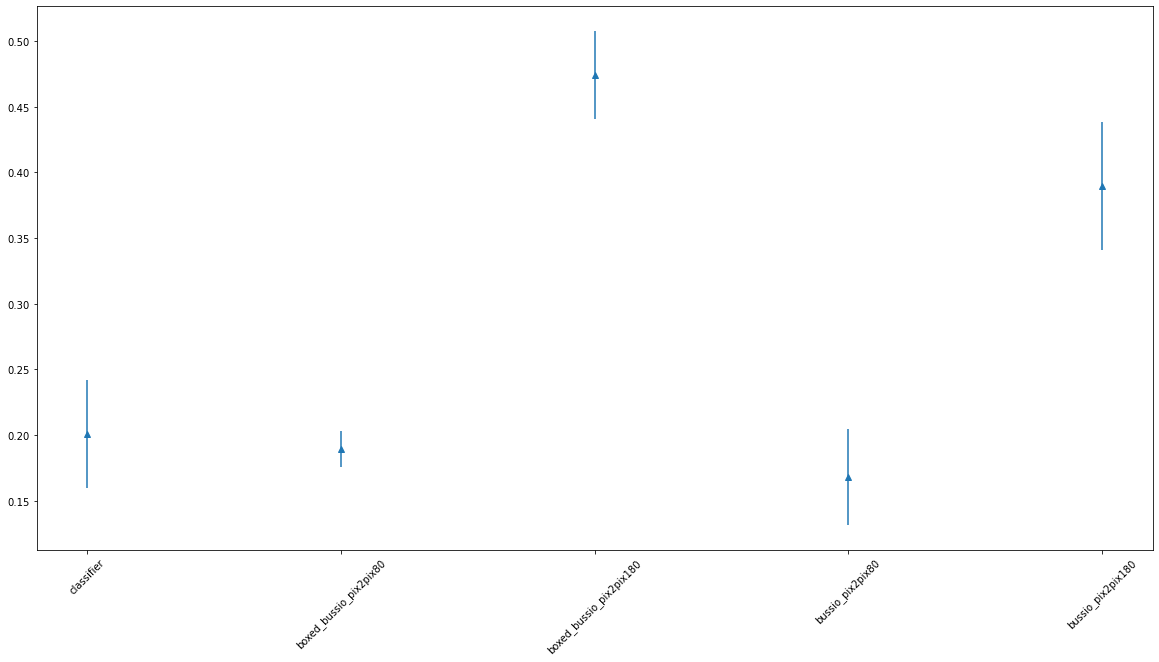

In [56]:
measure_path = ["milia_like_cyst", "f1_binary"]
dump_stat(measure_path)

negative_network f1_binary
                              avg       var
classifier               0.000000  0.000000
boxed_bussio_pix2pix80   0.000000  0.000000
boxed_bussio_pix2pix180  0.214088  0.069768
bussio_pix2pix80         0.000000  0.000000
bussio_pix2pix180        0.096866  0.047177


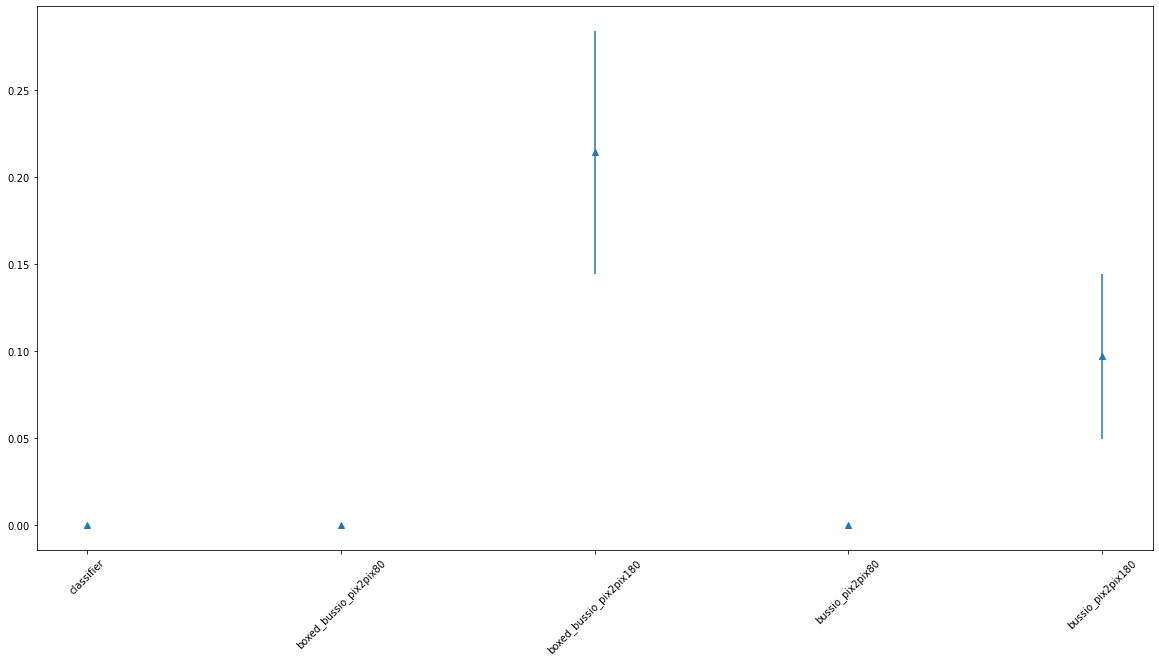

In [57]:
measure_path = ["negative_network", "f1_binary"]
dump_stat(measure_path)

pigment_network f1_binary
                              avg       var
classifier               0.846388  0.010549
boxed_bussio_pix2pix80   0.807545  0.003523
boxed_bussio_pix2pix180  0.885389  0.005993
bussio_pix2pix80         0.818933  0.014624
bussio_pix2pix180        0.866259  0.019562


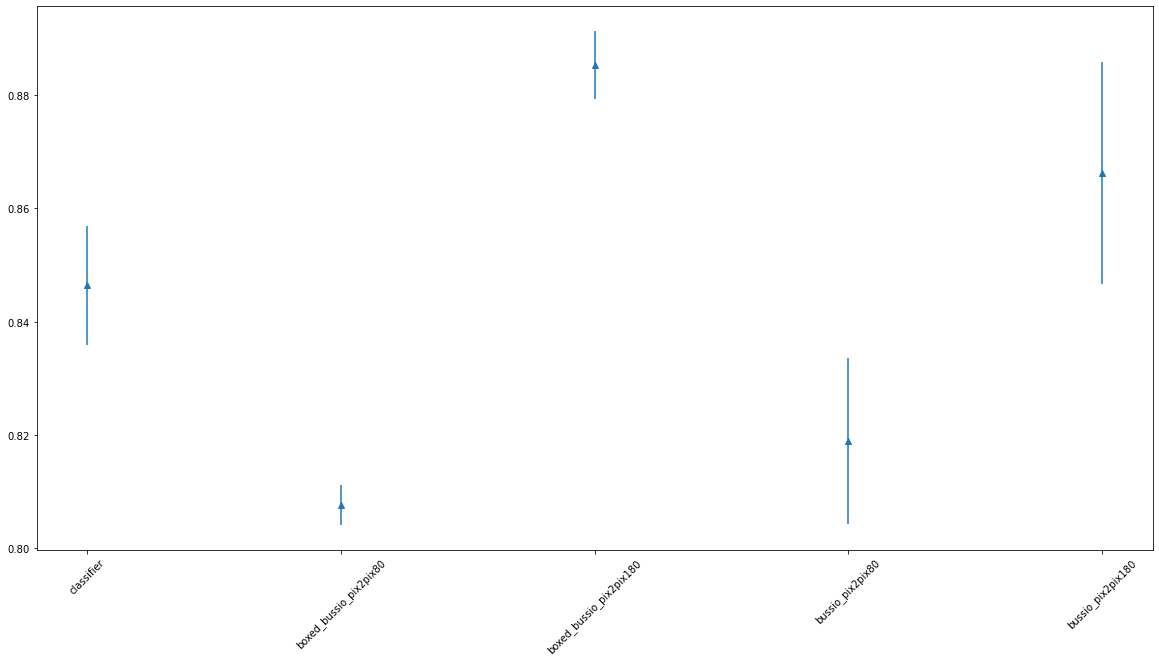

In [58]:
measure_path = ["pigment_network", "f1_binary"]
dump_stat(measure_path)

streaks f1_binary
                              avg       var
classifier               0.073016  0.150283
boxed_bussio_pix2pix80   0.146825  0.044233
boxed_bussio_pix2pix180  0.565958  0.043651
bussio_pix2pix80         0.085714  0.130931
bussio_pix2pix180        0.569870  0.134766


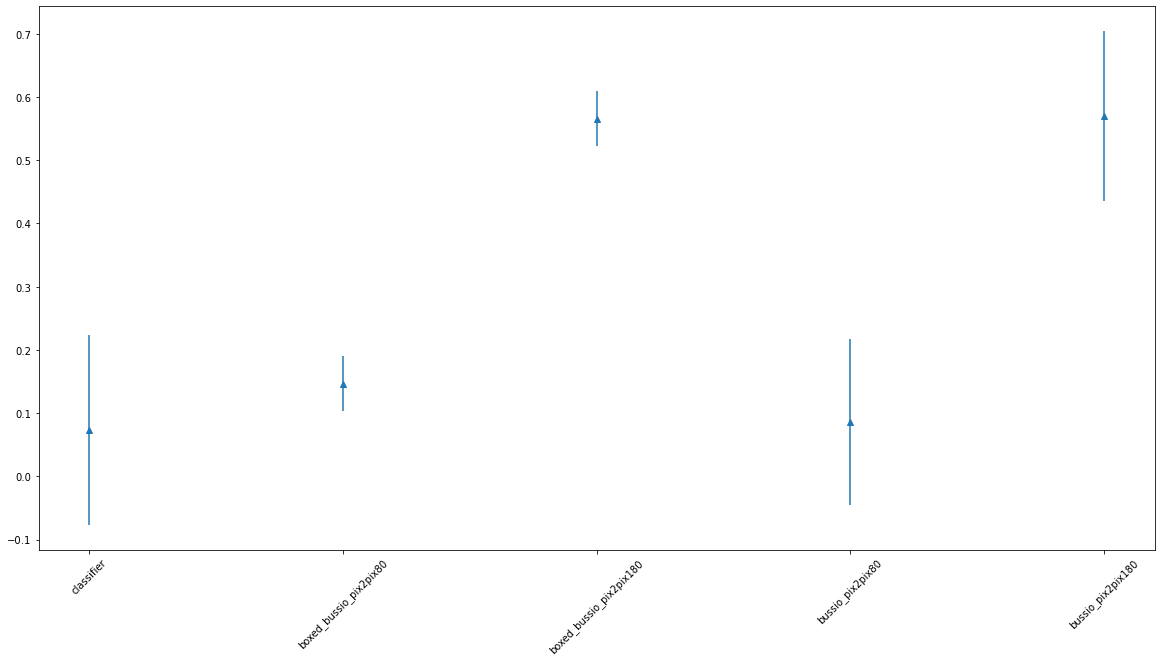

In [59]:
measure_path = ["streaks", "f1_binary"]
dump_stat(measure_path)

# заболевания auc

globules auc
                              avg       var
classifier               0.670588  0.023132
boxed_bussio_pix2pix80   0.599994  0.005630
boxed_bussio_pix2pix180  0.793852  0.013230
bussio_pix2pix80         0.612150  0.027091
bussio_pix2pix180        0.747988  0.028121


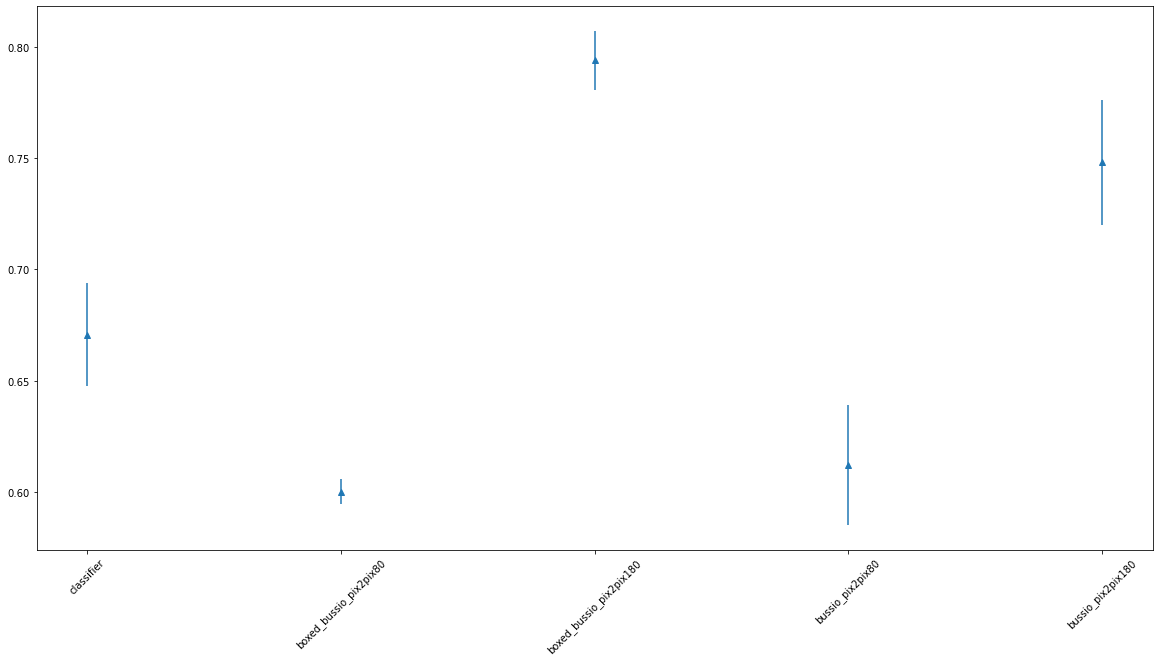

In [60]:
measure_path = ["globules", "auc"]
dump_stat(measure_path)

milia_like_cyst auc
                              avg       var
classifier               0.547680  0.014521
boxed_bussio_pix2pix80   0.543553  0.003764
boxed_bussio_pix2pix180  0.658312  0.017565
bussio_pix2pix80         0.536685  0.012120
bussio_pix2pix180        0.613816  0.020602


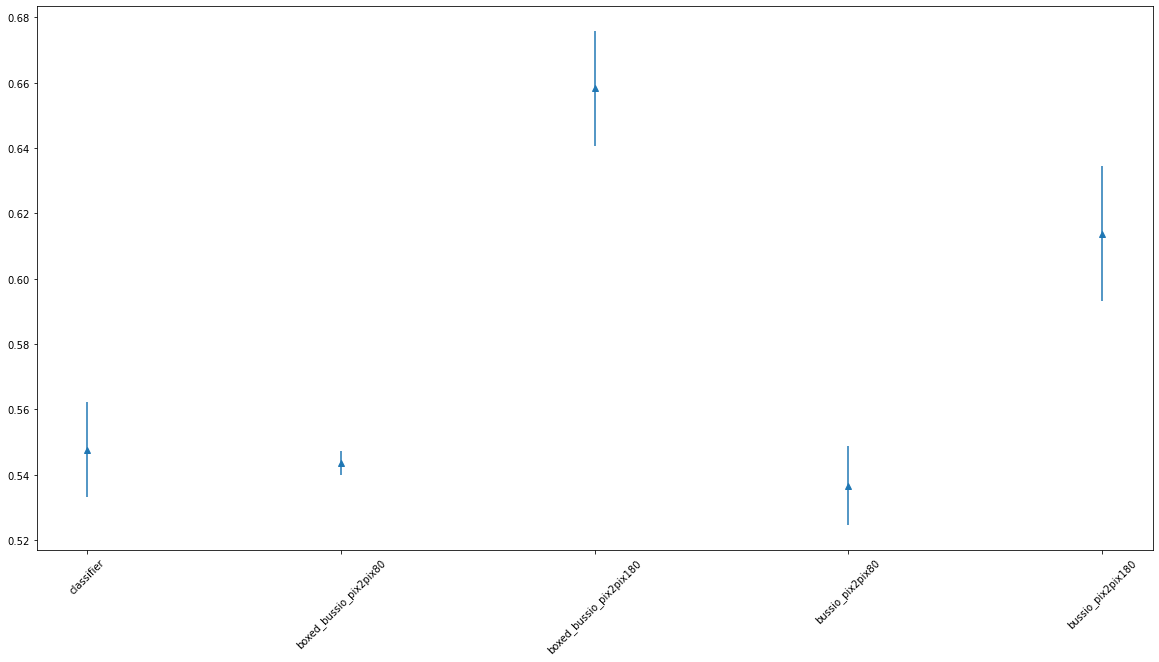

In [61]:
measure_path = ["milia_like_cyst", "auc"]
dump_stat(measure_path)

negative_network auc
                              avg       var
classifier               0.500000  0.000000
boxed_bussio_pix2pix80   0.500000  0.000000
boxed_bussio_pix2pix180  0.578889  0.027929
bussio_pix2pix80         0.500000  0.000000
bussio_pix2pix180        0.525333  0.013154


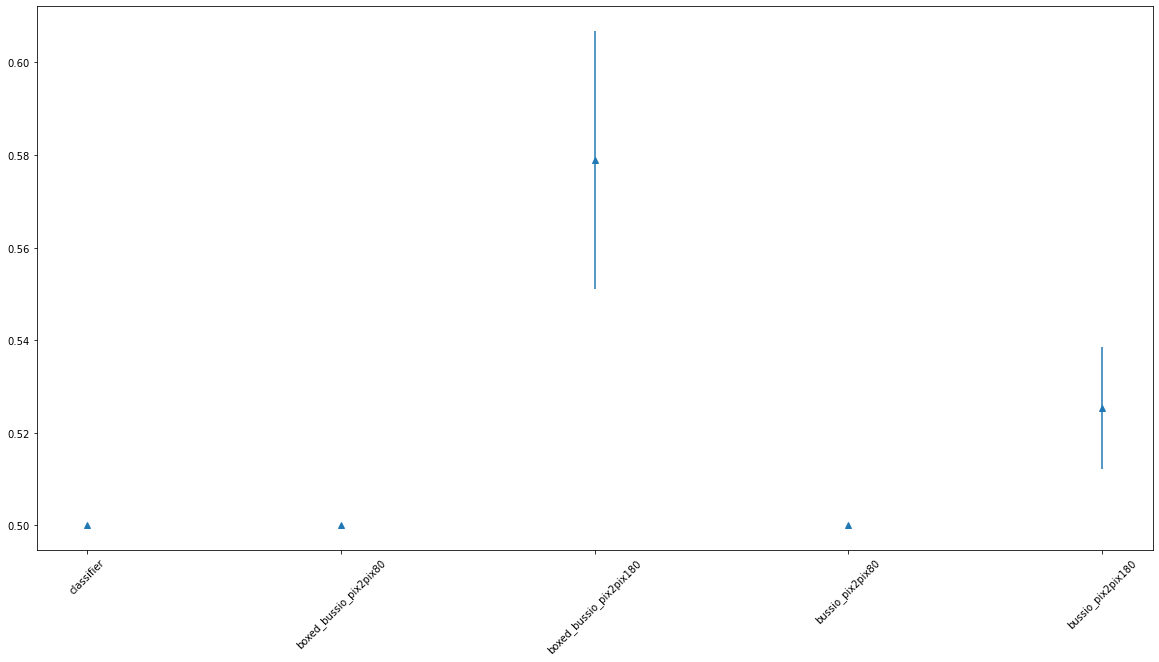

In [62]:
measure_path = ["negative_network", "auc"]
dump_stat(measure_path)

pigment_network auc
                              avg       var
classifier               0.799202  0.019206
boxed_bussio_pix2pix80   0.763122  0.005238
boxed_bussio_pix2pix180  0.851017  0.006678
bussio_pix2pix80         0.774213  0.020797
bussio_pix2pix180        0.828745  0.022816


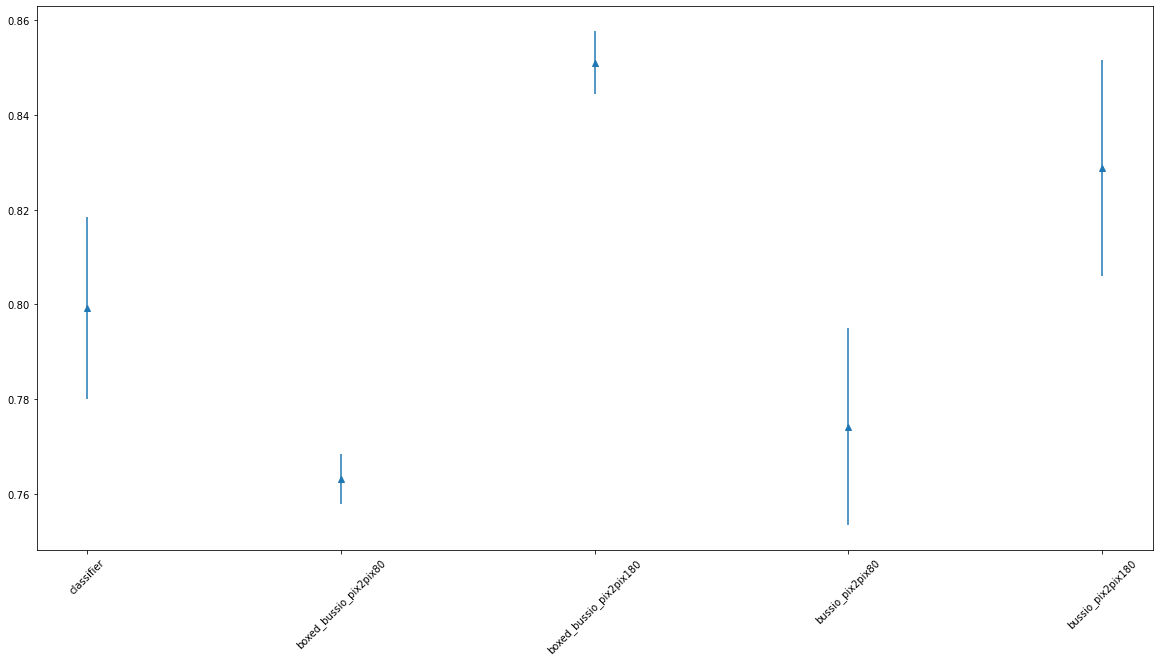

In [63]:
measure_path = ["pigment_network", "auc"]
dump_stat(measure_path)

streaks auc
                              avg       var
classifier               0.524795  0.052816
boxed_bussio_pix2pix80   0.545841  0.014280
boxed_bussio_pix2pix180  0.766991  0.029081
bussio_pix2pix80         0.524795  0.038327
bussio_pix2pix180        0.770492  0.075611


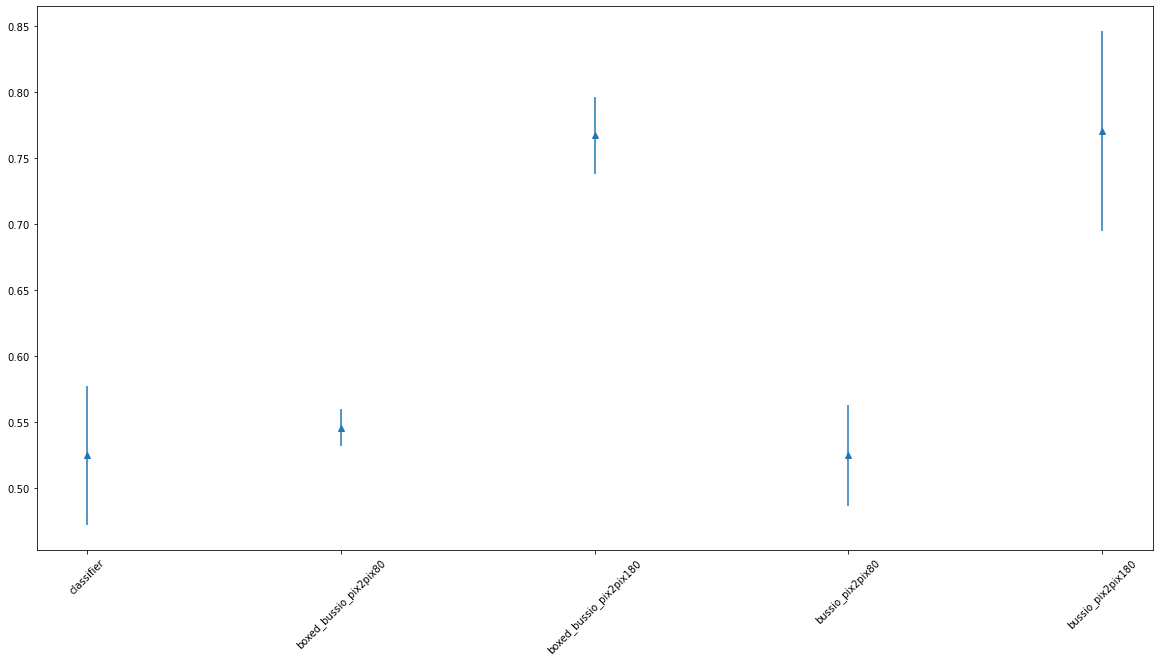

In [64]:
measure_path = ["streaks", "auc"]
dump_stat(measure_path)